##### Particle decay (Adaptativo)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [34]:
def System(N,t,h=1):

    NA = N[0]
    NB = N[1]

    lambdaA = 0.5/h
    lambdaB = 0.3/h

    dNAdt = -lambdaA*NA
    dNBdt = lambdaA*NA - lambdaB*NB
    dNCdt = lambdaB*NB
    
    return np.array([dNAdt,dNBdt, dNCdt])

In [35]:
t = np.linspace(0,10,50)
r = np.array([500.,0.,0.])

In [36]:
sol = odeint(System, r, t)

Text(0.5, 1.0, 'Solución 1')

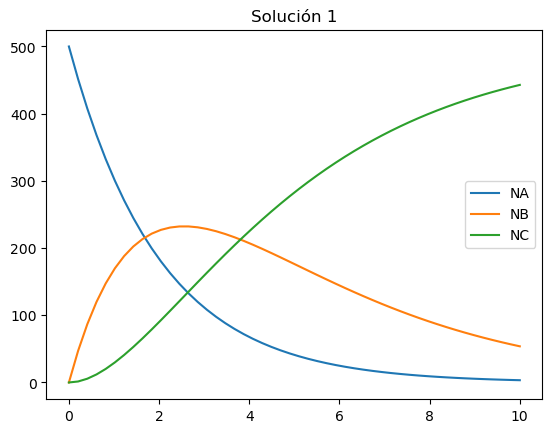

In [39]:
plt.figure(dpi=100)
plt.plot(t, sol[:,0])
plt.plot(t, sol[:,1])
plt.plot(t, sol[:,2])
plt.legend(["NA", "NB", "NC"])
plt.title("Solución 1")

In [25]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [17]:
def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h

In [26]:
def Adaptativo(f,r0,t,e=1e-4):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    
    while t < tf:
        
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)
        rt = Increment(f,r,t,2*h)

        error = np.linalg.norm(r2-rt)
        if error < e:
            t += 2*h
            r = rt

            Steps = np.append(Steps,h)
            Time = np.append(Time,t)
            Vector = np.vstack((Vector,r))

        q = 0.85 * (e/error)**(1/4)
        h = h*q

        
    return Time,Vector,Steps

In [42]:
t,vector,step = Adaptativo(System,r,t)

In [43]:
len(step)

38

Text(0.5, 1.0, 'Solución 2 con Fehlberg')

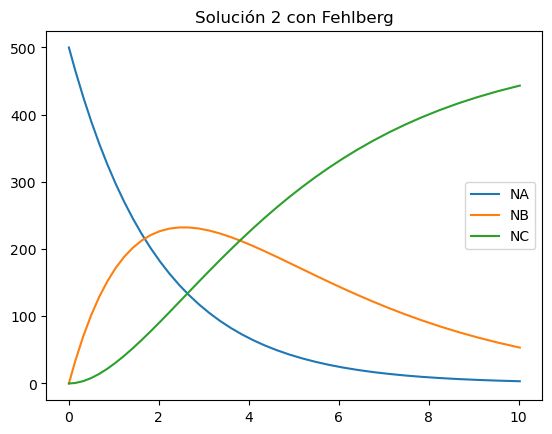

In [44]:
plt.figure(dpi=100)
plt.plot(t, vector[:,0])
plt.plot(t, vector[:,1])
plt.plot(t, vector[:,2])
plt.legend(["NA", "NB", "NC"])
plt.title("Solución 2 con Fehlberg")

In [47]:
bmax = np.max(vector[:,1])
bmax_ind = np.where(vector[:,1] == bmax)[0][0]
bmax_time = round(t[bmax_ind],3)
bmax = round(bmax,3)
cinb = vector[:,2][bmax_ind]
cinb = round(cinb,3)


print("La cantidad de particulas B es máxima en t = {}. En ese instante NB = {} y NC = {}".format(bmax_time, bmax, cinb))


La cantidad de particulas B es máxima en t = 2.452. En ese instante NB = 232.192 y NC = 121.078
